In [29]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from Data_for_bp import data_gather_from_files,run_strategy_optimised,run_strategy_eval
import seaborn as sns

In [4]:
tick_data = data_gather_from_files('1 jan 2021','31 jan 2021')['EURUSD.mid']

## grid based search

In [16]:
ladder_sizing_grid = np.array([0.001,0.003,0.005,0.007,0.009])
print(ladder_sizing_grid)
position_sizing_grid = np.arange(100000,1000000,200000)
print(position_sizing_grid)

[0.001 0.003 0.005 0.007 0.009]
[100000 300000 500000 700000 900000]


In [25]:
# heat map of profits for different ladder sizing and position sizing
def profit_map(tick_data,ladder_sizing,position_sizing):
    profits = np.zeros((len(ladder_sizing),len(position_sizing)))
    U_PNLs = np.zeros((len(ladder_sizing),len(position_sizing)))
    max_positions = np.zeros((len(ladder_sizing),len(position_sizing))) 
    R_PNLs = np.zeros((len(ladder_sizing),len(position_sizing)))
    for i in range(len(ladder_sizing)):
        for j in range(len(position_sizing)):
            profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,ladder_sizing[i],position_sizing[j])
            profits[i,j]=profit
            U_PNLs[i,j]=U_PNL
            max_positions[i,j]=max_position
            R_PNLs[i,j]=R_PNL
    return profits,U_PNLs,max_positions,R_PNLs

def profit_heat_map(profits, ladder_sizing, position_sizing,title):
    plt.figure(figsize=(10,10))
    
    # Create the heatmap without annotations
    ax = sns.heatmap(profits, cbar=True,alpha=0.7)
    
    # Manually add annotations shifted by the desired amount
    for i in range(len(ladder_sizing)):
        for j in range(len(position_sizing)):
            ax.text(j+0.5, i+0.5, f"{profits[i, j]:.2f}", 
                    ha='center', va='center', color='black', fontsize=10)
    
    plt.xticks(np.arange(len(position_sizing)) + 0.5, position_sizing)
    plt.yticks(np.arange(len(ladder_sizing)) + 0.5, ladder_sizing)
    plt.xlabel('Position Sizing')
    plt.ylabel('Ladder Sizing')
    plt.title(title+' Heat Map')
    plt.show()


In [12]:
profits,U_PNLs,max_positions,R_PNLs = profit_map(tick_data,ladder_sizing_grid,position_sizing_grid)

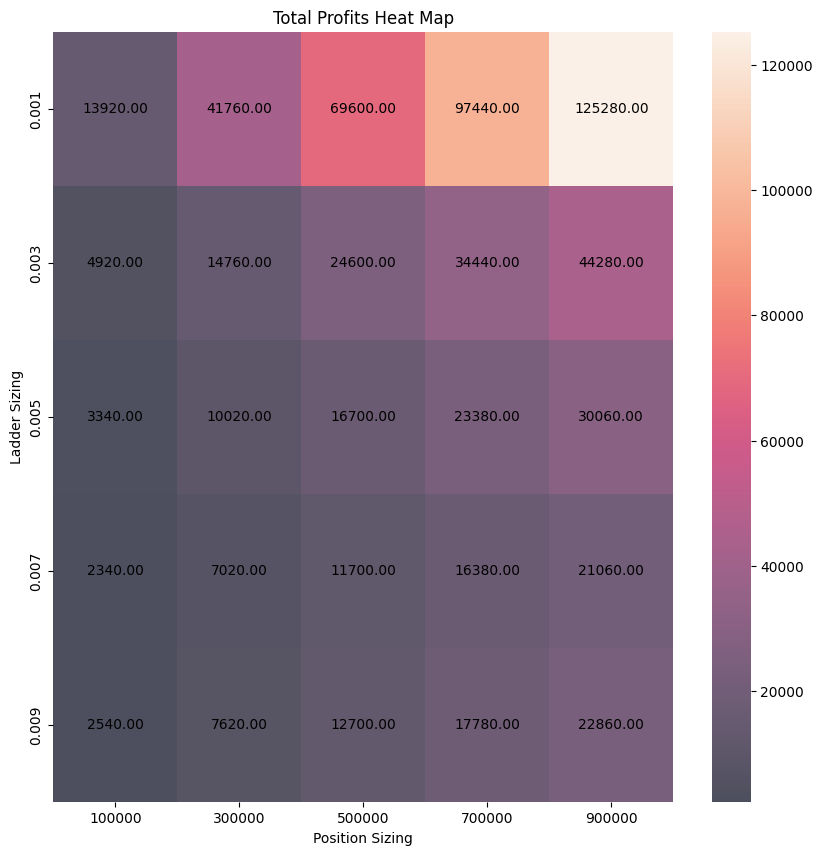

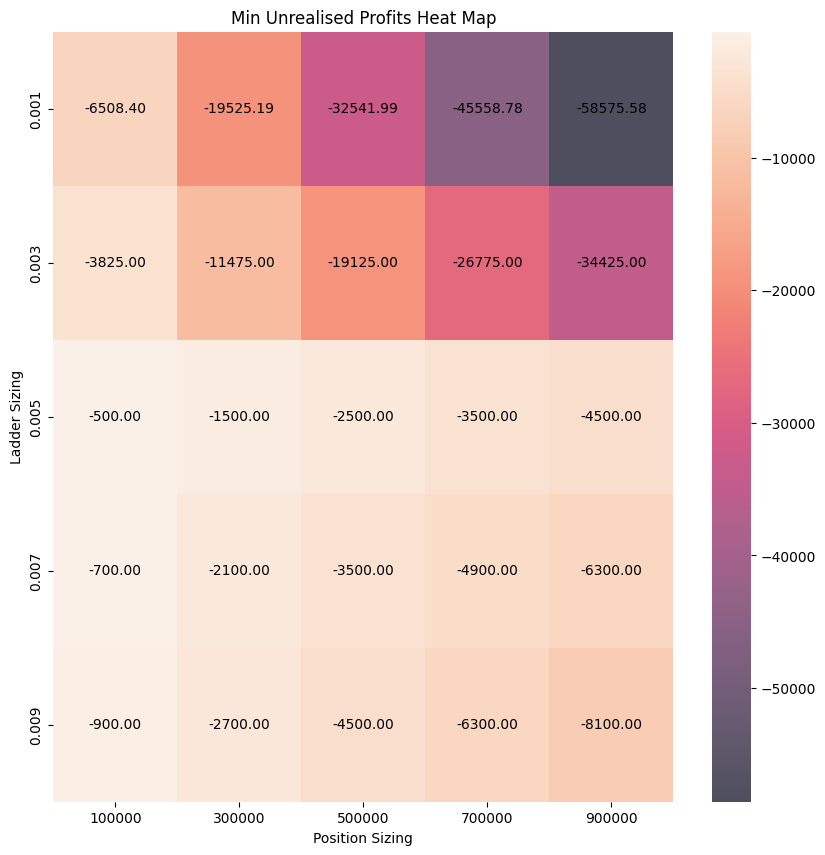

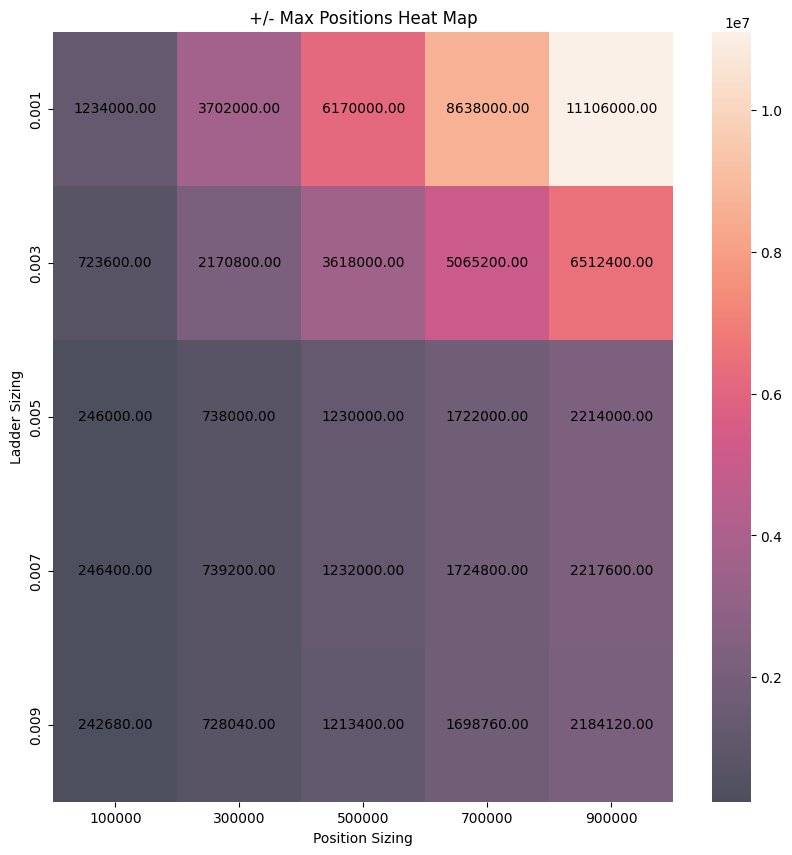

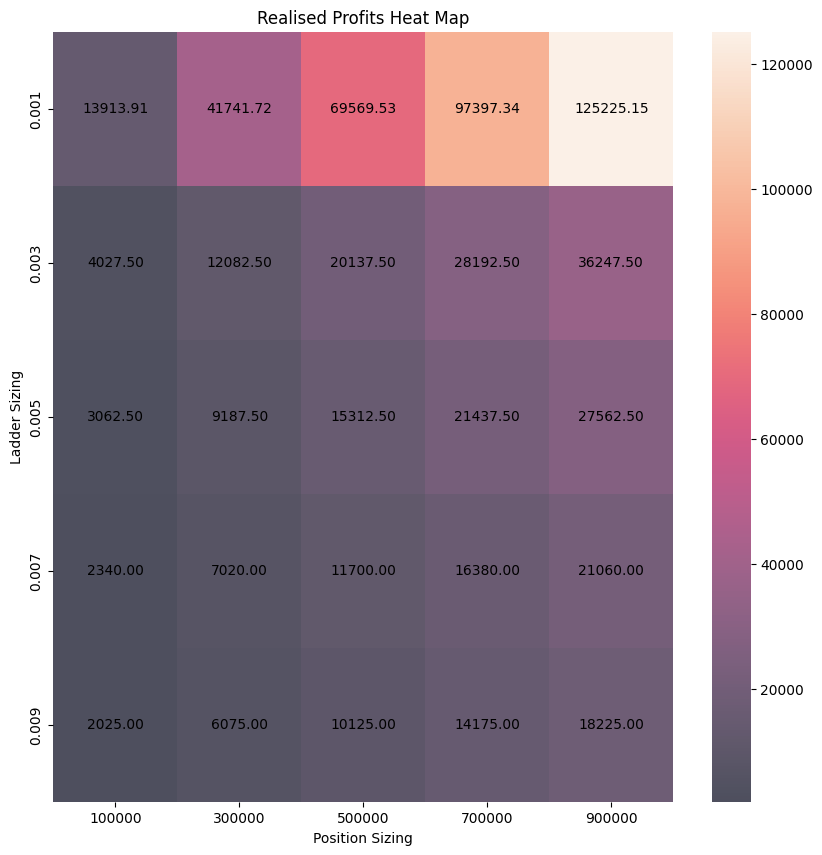

In [26]:
profit_heat_map(profits,ladder_sizing_grid,position_sizing_grid,'Total Profits')
profit_heat_map(U_PNLs,ladder_sizing_grid,position_sizing_grid,'Min Unrealised Profits')
profit_heat_map(max_positions,ladder_sizing_grid,position_sizing_grid,'+/- Max Positions')
profit_heat_map(R_PNLs,ladder_sizing_grid,position_sizing_grid,'Realised Profits')

In [33]:
trades = run_strategy_optimised(tick_data,0.001,900000,10)

## scipy 

In [35]:
from scipy.optimize import minimize

# Define the objective function
def objective(params, tick_data):
    G, n = params
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,G,n)
    return -R_PNL  # We negate the value since we want to maximize ProfitD

# Define the constraints
def constraint1(params, tick_data):
    G, n = params
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,G,n)
    return 10e6 - max_position

def constraint2(params, tick_data):
    G, n = params
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,G,n)
    return U_PNL + 150e3

# Define bounds
bounds = [(0.001, 0.01), (100000, 2000000)]

# Optimization
initial_guess = [0.005, 500000]  # Initial guess for G and n
result = minimize(objective, initial_guess, args=(tick_data,), bounds=bounds, method = 'SLSQP',constraints=[
    {"type": "ineq", "fun": constraint1, "args": (tick_data,)},
    {"type": "ineq", "fun": constraint2, "args": (tick_data,)}
])

optimal_G, optimal_n = result.x

In [36]:
print(' for scipy optimization with SLSQP, the optimal G and optimal_n is: ',optimal_G, optimal_n ,'with profit',-result.fun)

 for scipy optimization with SLSQP, the optimal G and optimal_n is:  0.005 500000.0 with profit 15312.5


In [ ]:
from scipy.optimize import minimize

# Define the objective function
def objective(params, tick_data):
    G, n = params
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,G,n)
    return -R_PNL  # We negate the value since we want to maximize ProfitD

# Define the constraints
def constraint1(params, tick_data):
    G, n = params
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,G,n)
    return 10e6 - max_position

def constraint2(params, tick_data):
    G, n = params
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,G,n)
    return U_PNL + 150e3

# Define bounds
bounds = [(0.001, 0.01), (100000, 2000000)]

# Optimization
initial_guess = [0.005, 500000]  # Initial guess for G and n
result = minimize(objective, initial_guess, args=(tick_data,), bounds=bounds, method = 'trust-constr',constraints=[
    {"type": "ineq", "fun": constraint1, "args": (tick_data,)},
    {"type": "ineq", "fun": constraint2, "args": (tick_data,)}
])

optimal_G, optimal_n = result.x

In [ ]:
print(' for scipy optimization with trust-constr optimal G and optimal_n is: ',optimal_G, optimal_n ,'with profit',-result.fun)


In [ ]:
from scipy.optimize import minimize

# Define the objective function
def objective(params, tick_data):
    G, n = params
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,G,n)
    return -R_PNL  # We negate the value since we want to maximize ProfitD

# Define the constraints
def constraint1(params, tick_data):
    G, n = params
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,G,n)
    return 10e6 - max_position

def constraint2(params, tick_data):
    G, n = params
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,G,n)
    return U_PNL + 150e3

# Define bounds
bounds = [(0.001, 0.01), (100000, 2000000)]

# Optimization
initial_guess = [0.005, 500000]  # Initial guess for G and n
result = minimize(objective, initial_guess, args=(tick_data,), bounds=bounds, method = 'COBYLA',constraints=[
    {"type": "ineq", "fun": constraint1, "args": (tick_data,)},
    {"type": "ineq", "fun": constraint2, "args": (tick_data,)}
])

optimal_G, optimal_n = result.x

In [ ]:
print(' for scipy optimization with COBYLA, the optimal G and optimal_n is: ',optimal_G, optimal_n ,'with profit',-result.fun)


In [ ]:
from scipy.optimize import minimize

# Define the objective function
def objective(params, tick_data):
    G, n = params
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,G,n)
    return -R_PNL  # We negate the value since we want to maximize ProfitD

# Define the constraints
def constraint1(params, tick_data):
    G, n = params
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,G,n)
    return 10e6 - max_position

def constraint2(params, tick_data):
    G, n = params
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,G,n)
    return U_PNL + 150e3

# Define bounds
bounds = [(0.001, 0.01), (100000, 2000000)]

# Optimization
initial_guess = [0.005, 500000]  # Initial guess for G and n
result = minimize(objective, initial_guess, args=(tick_data,), bounds=bounds, method = 'TNC',constraints=[
    {"type": "ineq", "fun": constraint1, "args": (tick_data,)},
    {"type": "ineq", "fun": constraint2, "args": (tick_data,)}
])

optimal_G, optimal_n = result.x

In [ ]:
print(' for scipy optimization with TNC, the optimal G and optimal_n is: ',optimal_G, optimal_n ,'with profit',-result.fun)

cut

In [ ]:
from scipy.optimize import minimize

# Define the objective function
def objective(params, tick_data):
    G, n = params
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,G,n)
    return -R_PNL  # We negate the value since we want to maximize ProfitD

# Define the constraints
def constraint1(params, tick_data):
    G, n = params
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,G,n)
    return 10e6 - max_position

def constraint2(params, tick_data):
    G, n = params
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,G,n)
    return U_PNL + 150e3

# Define bounds
bounds = [(0.001, 0.01), (100000, 2000000)]

# Optimization
initial_guess = [0.005, 500000]  # Initial guess for G and n
result = minimize(objective, initial_guess, args=(tick_data,), bounds=bounds, method = 'BFGS',constraints=[
    {"type": "ineq", "fun": constraint1, "args": (tick_data,)},
    {"type": "ineq", "fun": constraint2, "args": (tick_data,)}
])

optimal_G, optimal_n = result.x

In [ ]:
print(' for scipy optimization with BFGS, the optimal G and optimal_n is: ',optimal_G, optimal_n ,'with profit',-result.fun)

## optuna

In [ ]:
tick_data = data_gather_from_files('1 jan 2021','31 Dec 2021')['EURUSD.mid']

In [48]:
import optuna

def objective_optuna(trial, tick_data):
    G = trial.suggest_float("G", 0.001, 0.01)
    n = trial.suggest_float("n", 100000, 1000000)
    
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,G,n)
    
    # Constraints
    if max_position > 10e6:
        return float('inf')
    if U_PNL < -150e3:
        return float('inf')
    return -R_PNL  # We negate the value since we want to maximize ProfitD

study = optuna.create_study(direction="minimize")
study.optimize(lambda trial: objective_optuna(trial, tick_data), n_trials=30)

optimal_G = study.best_params["G"]
optimal_n = study.best_params["n"]


[I 2023-09-20 21:40:13,339] A new study created in memory with name: no-name-7b81617e-f6f7-41b7-af77-7fc76cb9b868
[I 2023-09-20 21:40:26,735] Trial 0 finished with value: -6090.1185 and parameters: {'G': 0.009540668453783836, 'n': 944204.4163367214}. Best is trial 0 with value: -6090.1185.
[I 2023-09-20 21:40:40,023] Trial 1 finished with value: -35415.9186 and parameters: {'G': 0.00235966269512994, 'n': 417379.54372167797}. Best is trial 1 with value: -35415.9186.
[I 2023-09-20 21:40:53,154] Trial 2 finished with value: -16520.9765 and parameters: {'G': 0.007797429995043322, 'n': 585850.2300420019}. Best is trial 1 with value: -35415.9186.
[I 2023-09-20 21:41:06,324] Trial 3 finished with value: -11717.8357 and parameters: {'G': 0.007894298526484694, 'n': 928349.661537451}. Best is trial 1 with value: -35415.9186.
[I 2023-09-20 21:41:19,567] Trial 4 finished with value: -28269.778 and parameters: {'G': 0.006231966220676825, 'n': 793929.6977628093}. Best is trial 1 with value: -35415.9

In [49]:
optimal_G, optimal_n, - study.best_value

(0.0011828294154015366, 420368.03127969167, 57301.9591)

## visualisation after finding optimal G and n

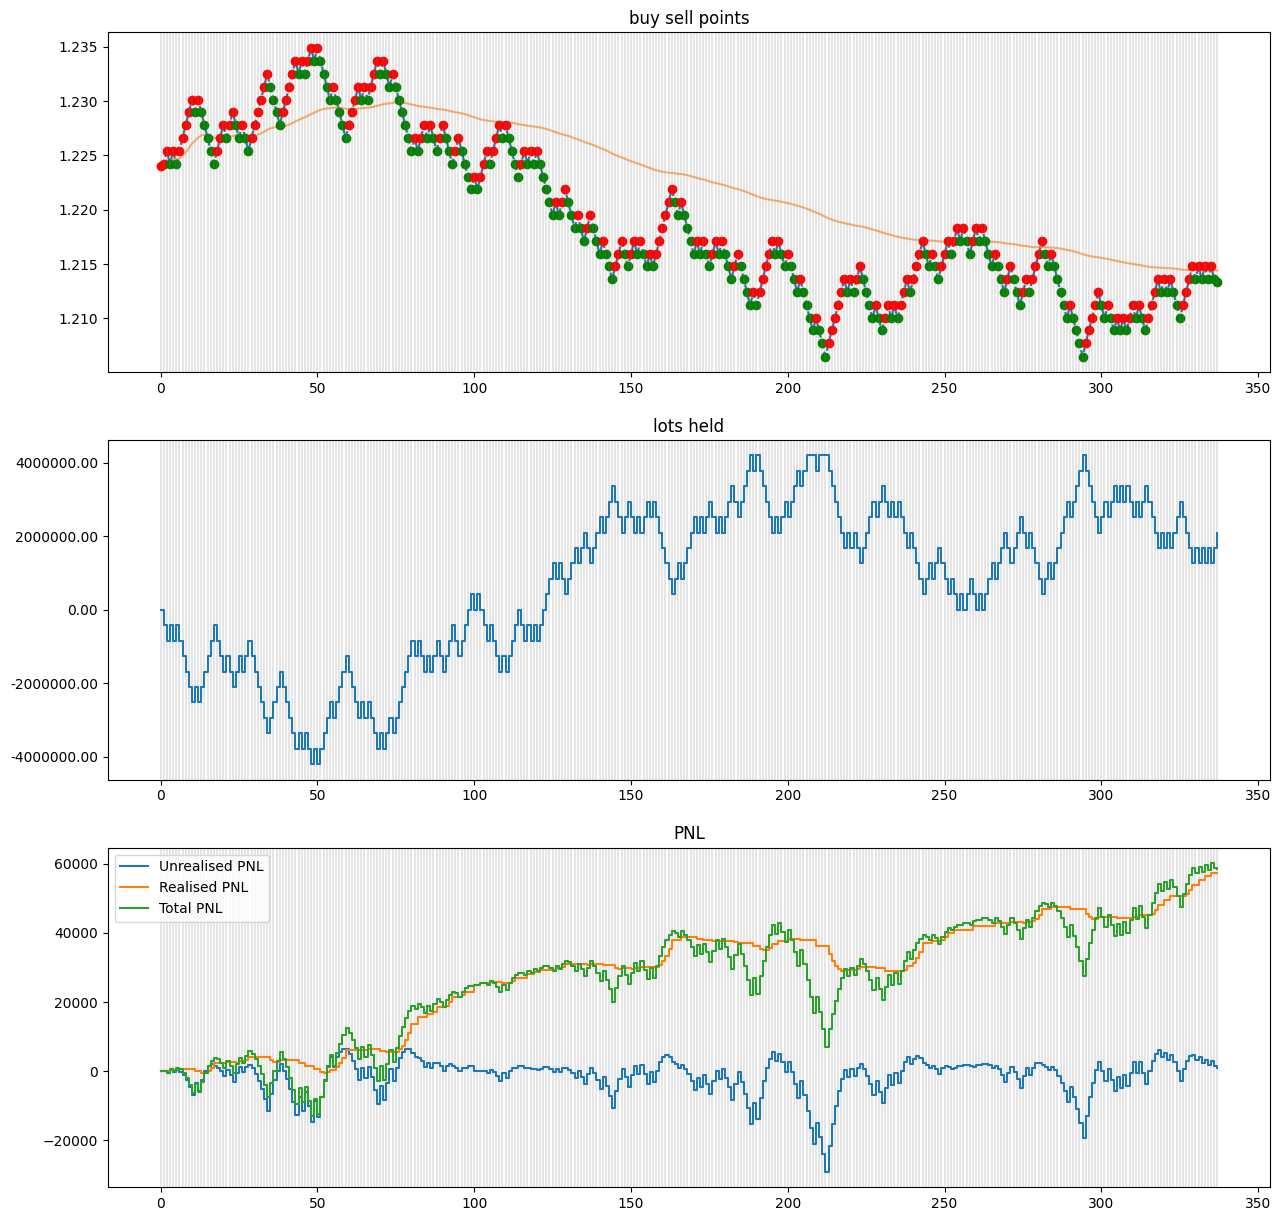

TypeError: cannot unpack non-iterable Styler object

In [50]:
_,a,b,c,d,e,f,g = run_strategy_eval(tick_data,optimal_G,optimal_n,trade_plot=True)
print('final profit is: ',a)
print('realised profit is: ',b)
print('final unrealised profit is: ',c)
print('max long lots held is: ',d)
print('max short lots held is :',e)
print('max long position is: ',f)
print('max short position is :',g)

In [52]:
import optuna

def objective_optuna(trial, tick_data):
    G = trial.suggest_float("G", 0.001, 0.01)
    n = trial.suggest_float("n", 100000, 1000000)
    d = trial.suggest_int("d", 3, 10)
    
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,G,n,d)
    
    # Constraints
    if max_position > 10e6:
        return float('inf')
    if U_PNL < -150e3:
        return float('inf')
    return -R_PNL  # We negate the value since we want to maximize ProfitD

study = optuna.create_study(direction="minimize")
study.optimize(lambda trial: objective_optuna(trial, tick_data), n_trials=100)

optimal_G = study.best_params["G"]
optimal_n = study.best_params["n"]
optimal_d = study.best_params["d"]

[I 2023-09-20 22:31:31,633] A new study created in memory with name: no-name-f110ffd6-8c6b-4081-952e-2a3a5c6efc73
[I 2023-09-20 22:31:45,030] Trial 0 finished with value: -35044.7787 and parameters: {'G': 0.003470851422247713, 'n': 681363.1640485241, 'd': 8}. Best is trial 0 with value: -35044.7787.
[I 2023-09-20 22:31:58,298] Trial 1 finished with value: -3883.7332 and parameters: {'G': 0.009469785716406411, 'n': 641939.3709252469, 'd': 3}. Best is trial 0 with value: -35044.7787.
[I 2023-09-20 22:32:11,478] Trial 2 finished with value: -49168.9241 and parameters: {'G': 0.002323618850903853, 'n': 663018.8314295969, 'd': 5}. Best is trial 2 with value: -49168.9241.
[I 2023-09-20 22:32:24,688] Trial 3 finished with value: -10634.7707 and parameters: {'G': 0.004727999937868395, 'n': 250278.97201575327, 'd': 10}. Best is trial 2 with value: -49168.9241.
[I 2023-09-20 22:32:37,916] Trial 4 finished with value: -4668.1698 and parameters: {'G': 0.008060168171273668, 'n': 163222.72115031988, 

In [53]:
optimal_G, optimal_n,optimal_d, - study.best_value

(0.0012464126016342632, 881919.4444195931, 8, 116605.2363)